In [1]:
# import 부분
import pandas as pd
import glob
import os


bill_df_with_segment = pd.read_csv("data/청구입금정보_with_segment.csv")

In [2]:
bill_df_with_segment

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E


### 결제 관련 컬럼들 살펴보기

In [4]:
# '결제' 또는 '연체'가 포함된 컬럼 추출
payment_columns = [col for col in bill_df_with_segment.columns if ('결제' in col or '연체' in col)]

# 결과 확인
print("📌 결제 및 연체 관련 컬럼:")
for col in payment_columns:
    print(col)

📌 결제 및 연체 관련 컬럼:
대표결제일
대표결제방법코드
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M


In [5]:
bill_df_with_segment['대표결제일'].value_counts()

대표결제일
25    541035
1     320025
27    277026
20    260177
15    251010
13    227232
23    218113
5     169131
12    135098
21      1144
10         9
Name: count, dtype: int64

In [6]:
# 세그먼트별 대표결제일 교차표 (도수)
repayment_freq = bill_df_with_segment.groupby("Segment")["대표결제일"].value_counts().unstack().fillna(0).astype(int)

# 세그먼트별 대표결제일 비율
repayment_ratio = bill_df_with_segment.groupby("Segment")["대표결제일"].value_counts(normalize=True).unstack().fillna(0)

# 결과 보기 좋게 정렬 (선택사항, 예: 날짜 오름차순)
repayment_freq = repayment_freq[sorted(repayment_freq.columns)]
repayment_ratio = repayment_ratio[sorted(repayment_ratio.columns)]

# 출력
from IPython.display import display
print("📊 세그먼트별 대표결제일 도수")
display(repayment_freq)

print("\n📈 세그먼트별 대표결제일 비율 (%)")
display((repayment_ratio * 100).round(2))

📊 세그먼트별 대표결제일 도수


대표결제일,1,5,10,12,13,15,20,21,23,25,27
Segment,,,,,,,,,,,
A,70,121,0,82,72,112,27,0,87,215,186
B,20,21,0,9,17,16,13,0,20,22,6
C,15941,11195,0,8624,9416,11446,11155,20,13932,28640,17221
D,47191,27607,1,24472,32337,37251,32566,48,28514,77549,41706
E,256803,130187,8,101911,185390,202185,216416,1076,175560,434609,217907



📈 세그먼트별 대표결제일 비율 (%)


대표결제일,1,5,10,12,13,15,20,21,23,25,27
Segment,,,,,,,,,,,
A,7.20,12.45,0.0,8.44,7.41,11.52,2.78,0.00,8.95,22.12,19.14
B,13.89,14.58,0.0,6.25,11.81,11.11,9.03,0.00,13.89,15.28,4.17
C,12.49,8.77,0.0,6.76,7.38,8.97,8.74,0.02,10.92,22.45,13.50
D,13.51,7.90,0.0,7.01,9.26,10.67,9.32,0.01,8.16,22.20,11.94
E,13.36,6.77,0.0,5.30,9.65,10.52,11.26,0.06,9.13,22.61,11.34


## ✅ 세그먼트별 대표결제일 분포 분석 요약

- **전체적으로 25일 결제 비율이 가장 높으며**, 거의 모든 세그먼트에서 가장 많은 고객이 25일을 대표결제일로 가지고 있음.
  - A: 22.12%
  - B: 15.28%
  - C: 22.45%
  - D: 22.20%
  - E: 22.61%

- **Segment E**는 전체 고객 수가 많기도 하지만, 25일뿐만 아니라 **13일, 15일, 20일, 27일** 등 **말일 위주의 결제일 분포**를 보임.
  - 이는 기업 정책 또는 자동 이체 비중이 높은 그룹일 가능성을 시사.

- **Segment A**는 고객 수는 적지만, **1일·5일·15일·25일·27일** 등 **중간/말일 분포가 고르게 퍼져 있음**.
  - 비교적 다양한 결제일을 가지는 고객 유형일 수 있음.

- **Segment B**는 전반적으로 비율이 낮고, 고객 수가 가장 적기 때문에 **특정 결제일에 집중된 분포는 뚜렷하지 않음**.

- **Segment C, D**는 25일 외에도 15일, 20일, 27일 쪽에 분포가 모이는 경향을 보임.

## 🔍 결론 및 시사점

- **대표결제일은 특정 세그먼트의 소비 패턴 및 고정 결제일 여부를 간접적으로 보여줄 수 있는 변수**로 판단됨.
- 단독으로 세그먼트를 완전히 분리하긴 어렵지만, **다른 변수들과 함께 분류 모델에 포함 시 보조 지표로 활용 가능성**이 있음.


In [8]:
bill_df_with_segment['대표결제방법코드'].value_counts()

대표결제방법코드
자동이체    2400000
Name: count, dtype: int64

## 대표결제방법코드 분포 결과 요약
- 모든 컬럼이 자동이체의 도수 하나의 값을 가지고 있으므로 제거해도 무방

In [10]:
bill_df_with_segment['연체건수_R6M'].value_counts()

연체건수_R6M
0    2020013
2     123222
1      83980
3      65626
4      42570
5      33248
6      26927
7       4408
8          6
Name: count, dtype: int64

In [11]:
bill_df_with_segment['연체건수_R3M'].value_counts()

연체건수_R3M
0    2143880
2     133015
3      60267
1      56725
4       6113
Name: count, dtype: int64

In [12]:
# Segment A~E 대상만 필터링
df_filtered = bill_df_with_segment[bill_df_with_segment['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# 연체건수 관련 컬럼
arrear_columns = ['연체건수_R6M', '연체건수_R3M']

# 세그먼트별 평균값 계산
segment_arrear_mean = df_filtered.groupby('Segment')[arrear_columns].mean().round(2)

# 결과 출력
from IPython.display import display
print("✅ 세그먼트별 평균 연체건수")
display(segment_arrear_mean)

✅ 세그먼트별 평균 연체건수


,연체건수_R6M,연체건수_R3M
Segment,,
A,0.42,0.22
B,0.81,0.51
C,0.60,0.30
D,0.60,0.30
E,0.40,0.20


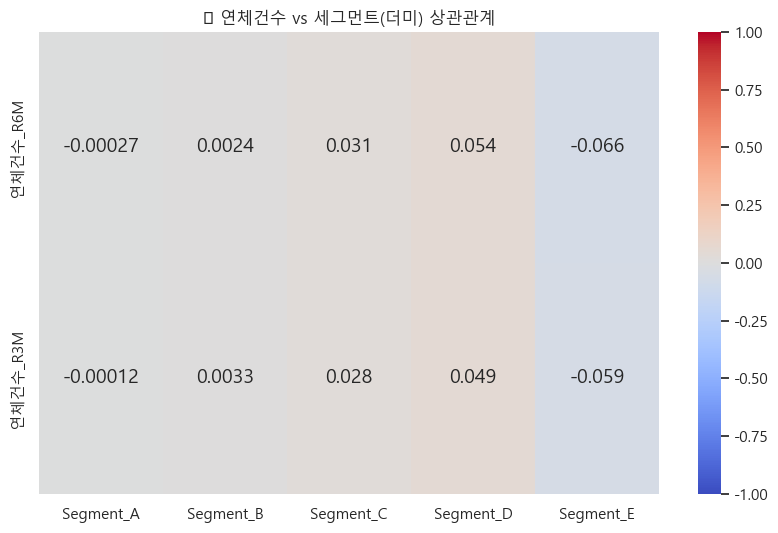

In [13]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Segment 더미 인코딩
df_corr = bill_df_with_segment.copy()
segment_dummies = pd.get_dummies(df_corr['Segment'], prefix='Segment')
df_corr = pd.concat([df_corr, segment_dummies], axis=1)

# 연체 관련 컬럼과 세그먼트 더미만 선택
corr_cols = ['연체건수_R6M', '연체건수_R3M'] + list(segment_dummies.columns)
corr_matrix = df_corr[corr_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[['연체건수_R6M', '연체건수_R3M'], segment_dummies.columns], 
            annot=True, cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title("✅ 연체건수 vs 세그먼트(더미) 상관관계")
plt.show()


## ✅ 세그먼트별 연체건수 분석

### 📊 1. 세그먼트별 평균 연체건수 비교

| Segment | 연체건수_R6M | 연체건수_R3M |
|---------|--------------|--------------|
| A       | 0.42         | 0.22         |
| B       | 0.81         | 0.51         |
| C       | 0.60         | 0.30         |
| D       | 0.60         | 0.30         |
| E       | 0.40         | 0.20         |

- **Segment B**가 가장 높은 평균 연체건수를 보여주며, **신용 위험이 가장 높은 그룹**으로 해석 가능
- **Segment E**는 평균 연체건수가 가장 낮아, **신용 우량 고객군**으로 볼 수 있음
- A, C, D는 중간 수준이며, 상대적으로 Segment A는 R6M과 R3M 간의 간극이 작아 **연체 지속성이 낮을 가능성** 있음

---

### 📈 2. 세그먼트 더미 vs 연체건수 상관관계 (히트맵 기반 해석)

- 상관계수는 모두 0.1 미만으로 **약한 관계**를 보여줌
- 그럼에도 불구하고, **Segment D**는 양의 상관을, **Segment E**는 음의 상관을 보이며 경향성은 존재함

```text
- Segment_D: 연체건수_R6M = 0.054 / 연체건수_R3M = 0.049 → 연체 경험이 약간 더 많은 경향
- Segment_E: 연체건수_R6M = -0.066 / 연체건수_R3M = -0.059 → 연체 경험이 상대적으로 적은 편


In [15]:
bill_df_with_segment['상환개월수_결제일_R6M'].value_counts()

상환개월수_결제일_R6M
6    1144509
0     420940
5     225452
1     200460
4     197806
2     130732
3      80101
Name: count, dtype: int64

In [16]:
# ✅ 1. 교차표 (도수분포)
repayment_r6m = bill_df_with_segment.groupby("Segment")["상환개월수_결제일_R6M"].value_counts().unstack().fillna(0)
repayment_r6m = repayment_r6m.astype(int)  # 정수로 변환 (옵션)
display(repayment_r6m)

# ✅ 2. 교차표 (비율 분포)
repayment_r6m_ratio = bill_df_with_segment.groupby("Segment")["상환개월수_결제일_R6M"] \
                                          .value_counts(normalize=True).unstack().fillna(0)
repayment_r6m_ratio = (repayment_r6m_ratio * 100).round(2)  # 퍼센트로 변환
display(repayment_r6m_ratio)

상환개월수_결제일_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,16,29,45,13,83,154,632
B,32,15,20,8,6,10,53
C,10001,5915,6615,3420,10902,13574,77163
D,28069,16986,17649,8985,29435,35652,212466
E,382822,177515,106403,67675,157380,176062,854195


상환개월수_결제일_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,1.65,2.98,4.63,1.34,8.54,15.84,65.02
B,22.22,10.42,13.89,5.56,4.17,6.94,36.81
C,7.84,4.64,5.18,2.68,8.54,10.64,60.48
D,8.04,4.86,5.05,2.57,8.43,10.21,60.84
E,19.92,9.24,5.54,3.52,8.19,9.16,44.44


## ✅ 세그먼트별 상환개월수_결제일_R6M 분석 결과 해석

상환개월수는 `0~6개월`까지 다양하게 분포되어 있으며, 각 세그먼트의 상환 패턴이 상이하게 나타납니다.

### 🔹 전체 요약
- 대부분의 세그먼트에서 **6개월 상환**이 가장 많음.
- A세그먼트는 6개월 비중이 **65.02%**로 가장 집중도가 높음.
- E세그먼트는 전체 건수는 많지만, 6개월 비중은 **44.44%**로 다른 세그먼트 대비 상대적으로 분산됨.

### 🔸 세그먼트별 특성 요약

#### 🟦 Segment A
- **전체 건수는 적지만**, 6개월 상환에 매우 집중된 형태 (65% 이상).
- 이는 고정적인 상환 패턴을 가진 우량 고객군일 가능성 있음.

#### 🟪 Segment B
- 0개월(22.22%)과 6개월(36.81%) 중심으로 분포.
- 일부 단기 상환(0개월)이 많다는 점에서 유연한 상환 성향일 가능성 있음.

#### 🟥 Segment C / D
- 각각 60% 이상이 6개월 상환으로 집중됨.
- C, D 모두 비교적 안정적인 장기 상환 비중이 높은 편.
- 다만, 4~5개월 구간도 일정 비율 존재하여 분산된 특성도 일부 존재.

#### 🟨 Segment E
- 가장 많은 고객 수 보유.
- 하지만 6개월 상환 비중이 **44.44%**로 타 세그먼트보다 낮음.
- 다양한 상환개월 수로 분산되어 있어 **다양한 상환 패턴**을 보이는 고객군.

---

### 📌 인사이트
- 마케팅 또는 리스크 관리 측면에서 **6개월 상환 비율이 높은 세그먼트(A, C, D)**는 **우량 고객 또는 장기 사용 고객**으로 볼 수 있음.
- 반면, B나 E처럼 0~4개월 구간의 비중도 적지 않은 세그먼트는 **유연한 상환 전략 또는 모니터링 강화 대상**이 될 수 있음.


In [18]:
bill_df_with_segment['상환개월수_결제일_R3M'].value_counts()

상환개월수_결제일_R3M
3    1405719
0     570842
1     221954
2     201485
Name: count, dtype: int64

In [19]:
import pandas as pd

# 도수 교차표
r3m_month_ct = pd.crosstab(bill_df_with_segment['Segment'], bill_df_with_segment['상환개월수_결제일_R3M'])

# 비율표
r3m_month_ratio = pd.crosstab(bill_df_with_segment['Segment'], bill_df_with_segment['상환개월수_결제일_R3M'], normalize='index') * 100
r3m_month_ratio = r3m_month_ratio.round(2)

# 결과 출력
from IPython.display import display
print("📊 세그먼트별 상환개월수_결제일_R3M 도수표")
display(r3m_month_ct)

print("📈 세그먼트별 상환개월수_결제일_R3M 비율표 (%)")
display(r3m_month_ratio)

📊 세그먼트별 상환개월수_결제일_R3M 도수표


상환개월수_결제일_R3M,0,1,2,3
Segment,,,,
A,24,86,112,750
B,44,27,8,65
C,14131,11964,11981,89514
D,40629,31229,30935,246449
E,516014,178648,158449,1068941


📈 세그먼트별 상환개월수_결제일_R3M 비율표 (%)


상환개월수_결제일_R3M,0,1,2,3
Segment,,,,
A,2.47,8.85,11.52,77.16
B,30.56,18.75,5.56,45.14
C,11.08,9.38,9.39,70.16
D,11.63,8.94,8.86,70.57
E,26.85,9.29,8.24,55.61


### ✅ 세그먼트별 `상환개월수_결제일_R3M` 분석 결과 해석

`상환개월수_결제일_R3M`은 최근 3개월 간 결제일 기준으로 고객이 몇 개월치 상환을 했는지를 나타내며, 숫자가 작을수록 **이자만 납부하거나 최소한의 상환만 수행한 고객**을 의미합니다.

#### 🔍 주요 인사이트
- **Segment B**:
  - '0개월 상환' 비율이 **30.56%**로, 전체 세그먼트 중 가장 높음.
  - 이는 **이자만 납부하고 원금은 상환하지 않은 고객이 많다**는 뜻으로 해석 가능.
  - **리스크가 높거나 재무적 여유가 부족할 수 있는 그룹**으로 간주됨.

- **Segment A, C, D**:
  - '3개월 상환' 비율이 각각 **77.16%**, **70.16%**, **70.57%**로 높게 나타남.
  - 비교적 **정상적인 상환 행태**를 보이고 있으며, **적극적인 원리금 납부**가 이루어지는 세그먼트임을 시사함.

- **Segment E**:
  - '0개월 상환' 비율이 **26.85%**로 다소 높음.
  - 전반적으로 다양한 상환 패턴이 혼합되어 있음.
  - 고객 규모가 많아 평균적인 특성보다는 **세부 세분화 분석이 필요**할 수 있음.

#### 📝 요약
- **B세그먼트는 원리금 상환보다는 이자만 납부하는 패턴이 뚜렷**, 이는 **상환 능력이 낮거나 재정적 위험이 내재된 집단**일 가능성이 있음.
- 이 정보를 바탕으로 **신용 리스크 평가**, **혜택 설계**, **고객 관리 전략** 등에 활용할 수 있음.


In [21]:
bill_df_with_segment['선결제건수_R6M'].value_counts()

선결제건수_R6M
0    2163770
2      88920
3      50806
4      24749
6      22993
5      20030
1      16111
7      11647
8        974
Name: count, dtype: int64

In [22]:
bill_df_with_segment['선결제건수_R3M'].value_counts()

선결제건수_R3M
0    2222052
2     106669
3      45019
1      17969
4       8291
Name: count, dtype: int64

In [40]:
import pandas as pd
from IPython.display import display

# 1. 도수표: 선결제건수_R6M
prepay_r6m_count = bill_df_with_segment.groupby("Segment")['선결제건수_R6M'].value_counts().unstack().fillna(0)
display(prepay_r6m_count)

# 2. 비율표: 선결제건수_R6M
prepay_r6m_ratio = bill_df_with_segment.groupby("Segment")['선결제건수_R6M'].value_counts(normalize=True).unstack().fillna(0) * 100
display(prepay_r6m_ratio)

# 3. 도수표: 선결제건수_R3M
prepay_r3m_count = bill_df_with_segment.groupby("Segment")['선결제건수_R3M'].value_counts().unstack().fillna(0)
display(prepay_r3m_count)

# 4. 비율표: 선결제건수_R3M
prepay_r3m_ratio = bill_df_with_segment.groupby("Segment")['선결제건수_R3M'].value_counts(normalize=True).unstack().fillna(0) * 100
display(prepay_r3m_ratio)

선결제건수_R6M,0,1,2,3,4,5,6,7,8
Segment,,,,,,,,,
A,763.0,19.0,73.0,58.0,28.0,22.0,9.0,0.0,0.0
B,62.0,2.0,19.0,13.0,3.0,7.0,19.0,17.0,2.0
C,100065.0,1044.0,8550.0,6790.0,3446.0,2380.0,2945.0,2098.0,272.0
D,284478.0,3278.0,22086.0,14154.0,7061.0,5955.0,7551.0,4311.0,368.0
E,1778402.0,11768.0,58192.0,29791.0,14211.0,11666.0,12469.0,5221.0,332.0


선결제건수_R6M,0,1,2,3,4,5,6,7,8
Segment,,,,,,,,,
A,78.497942,1.954733,7.510288,5.967078,2.880658,2.263374,0.925926,0.000000,0.000000
B,43.055556,1.388889,13.194444,9.027778,2.083333,4.861111,13.194444,11.805556,1.388889
C,78.426993,0.818246,6.701152,5.321734,2.700839,1.865350,2.308175,1.644329,0.213183
D,81.455839,0.938604,6.323982,4.052777,2.021807,1.705121,2.162111,1.234388,0.105371
E,92.526217,0.612262,3.027598,1.549958,0.739366,0.606955,0.648734,0.271637,0.017273


선결제건수_R3M,0,1,2,3,4
Segment,,,,,
A,824.0,19.0,93.0,36.0,0.0
B,74.0,0.0,26.0,29.0,15.0
C,106075.0,1295.0,12697.0,5827.0,1696.0
D,298891.0,3768.0,29099.0,14457.0,3027.0
E,1816188.0,12887.0,64754.0,24670.0,3553.0


선결제건수_R3M,0,1,2,3,4
Segment,,,,,
A,84.773663,1.954733,9.567901,3.703704,0.000000
B,51.388889,0.000000,18.055556,20.138889,10.416667
C,83.137393,1.014970,9.951407,4.566972,1.329258
D,85.582776,1.078908,8.332045,4.139536,0.866734
E,94.492137,0.670481,3.369004,1.283524,0.184855


### ✅ 세그먼트별 선결제건수 분석 결과

#### 🔹 선결제건수_R6M
- **Segment A**는 대부분(약 78%)이 `선결제 없음 (0건)`으로 나타나며, 일부(7~8%)는 `2~3건`의 선결제가 발생함.
- **Segment B**는 비교적 분산된 분포를 보이며, `0건`이 43%로 절반을 차지하지 않음. `6건(13.2%)`, `7건(11.8%)`과 같은 높은 빈도도 확인됨. **소액을 자주 선결제**하는 경향.
- **Segment C, D**는 전체적으로 `0건`이 78~81%로 매우 높은 편. 나머지는 적은 비율로 분산되어 있으나 전체 비중은 낮음.
- **Segment E**는 **압도적으로 선결제 경험이 없음 (92.5%)**, 다른 세그먼트보다 **선결제 비율이 가장 낮음**.

#### 🔹 선결제건수_R3M
- 전체적으로 `0건`이 모든 세그먼트에서 가장 높은 비율을 차지.
- **Segment A**는 84%가 선결제 없음, 그 외 10%가 `2건`으로 구성되어 있음.
- **Segment B**는 비교적 골고루 분포됨. `0건`은 51%로 가장 낮고, `2건(18%)`, `3건(20%)`, `4건(10%)` 등 다양한 선결제 이력이 확인됨. **단기적 활동성이 높고 신용이 낮을 가능성** 있음.
- **Segment C, D**도 약 83~85%가 선결제 없음.
- **Segment E**는 94.5%가 선결제 없음으로, **가장 보수적이고 활동성이 낮은** 특성이 나타남.

---

### 🔍 인사이트 요약
- **Segment B**는 선결제를 자주, 다양하게 사용하는 특성이 뚜렷하게 나타나며, 이는 **적극적인 신용 활용 성향**으로 해석될 수 있음.
- 반면 **Segment E**는 선결제를 거의 하지 않아, **신용 사용에 보수적**이며 **리스크가 낮은 고객군**일 수 있음.
- **Segment A, C, D**는 중간적 위치에 있으며, 대체로 선결제 이용률은 낮음.

✔️ 이 정보는 **결제 성향에 따른 고객 분류 및 마케팅 전략 수립**에 유용하게 활용될 수 있습니다.


- 단독 변수로는 모든 세그먼트를 명확히 분리하기에는 한계가 있음.
- 하지만 **Segment B**처럼 활발하게 선결제를 하는 집단과, **Segment E**처럼 거의 선결제를 하지 않는 집단은 **뚜렷하게 분리**되므로, 분류 모델이나 클러스터링에서 충분히 **유의미한 피처로 활용 가능**함.
- 특히 `연체`, `청구 패턴`, `할인 수혜`, `이자율` 등 다른 금융 관련 변수와 **결합하여 다변량 분석**할 경우, 세그먼트의 특성 설명력은 더욱 향상될 수 있음.